<a href="https://colab.research.google.com/github/Kavyapersis/Amazon-Reviews-using-Sentiment-Analysis/blob/master/Parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries used for data cleaning, and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Chi Square
from sklearn.feature_selection import chi2
import scipy.stats as stats

# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

# Constant feature checking
from sklearn.feature_selection import VarianceThreshold

# Cross Validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Importing library to split the data into training part and testing part.
from sklearn.model_selection import train_test_split

# Importing library to process the data (Normalize the data)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Importing Models (used for making prediction)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# Importing metrics used for evaluation of our models
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
pd.set_option('display.max_columns',29)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/database.csv")

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [ ]:
df.shape

(195, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df["status"].value_counts()

,count
status,
1,147
0,48


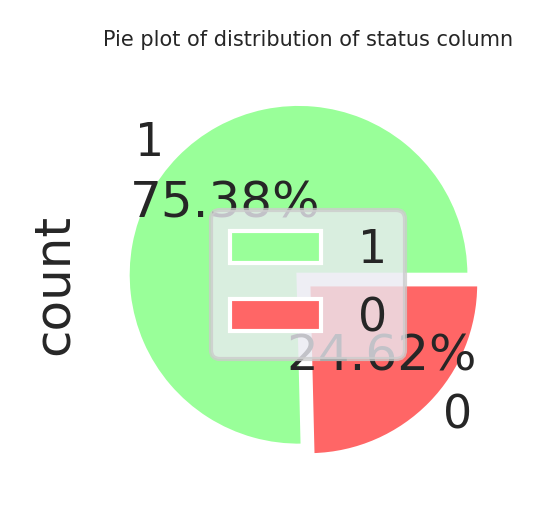

In [ ]:
explode=(0.08,0)

df['status'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(2,4),explode=explode,colors=['#99ff99','#ff6666'])
plt.title("Pie plot of distribution of status column", fontsize=5)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Convert all columns except 'status' to numeric type, coercing errors to NaN
for col in df.columns:
    if col != 'status':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate the mean for each numeric column, grouped by 'status'
df.groupby("status").mean()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,NaN,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [ ]:
sns.set(font_scale=0.25)
cmap = sns.diverging_palette(260, 10, as_cmap=True)
plt.figure(figsize=(4, 4))
sns.heatmap(df.drop(["name", "status"], axis=1).corr("spearman"), vmax=1.2, annot=True, square='square', cmap=cmap, fmt = '.0%', linewidths=2)
plt.show()

NameError: name 'sns' is not defined

In [ ]:
# With the following function we can select highly correlated features
# It will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr("spearman")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df.drop(["name", "status"], axis=1), 0.85)
corr_features

{'HNR',
 'Jitter:DDP',
 'MDVP:APQ',
 'MDVP:Jitter(Abs)',
 'MDVP:PPQ',
 'MDVP:RAP',
 'MDVP:Shimmer(dB)',
 'PPE',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:DDA'}

In [ ]:
df_anova = df.drop(["name"], axis=1)
grps = pd.unique(df_anova.status.values)

coldrop = []

for i in range(len(df_anova.columns)-1):

    d_data = {grp:df_anova[df_anova.columns[i]][df_anova.status == grp] for grp in grps}

    F, p = stats.f_oneway(d_data[0], d_data[1])
    print("P_Value of {} and status".format(df_anova.columns[i]), p)

    if p < 0.05:
        print("There is relation between {} and status \n".format(df_anova.columns[i]))
    else:
        print("There is no relation between {} and status \n".format(df_anova.columns[i]))
        coldrop.append(df_anova.columns[i])

P_Value of MDVP:Fo(Hz) and status 3.121919402836332e-08
There is relation between MDVP:Fo(Hz) and status 

P_Value of MDVP:Fhi(Hz) and status 0.020275669142798408
There is relation between MDVP:Fhi(Hz) and status 

P_Value of MDVP:Flo(Hz) and status 4.1970041821535477e-08
There is relation between MDVP:Flo(Hz) and status 

P_Value of MDVP:Jitter(%) and status 8.209989250843925e-05
There is relation between MDVP:Jitter(%) and status 

P_Value of MDVP:Jitter(Abs) and status 1.282252324068255e-06
There is relation between MDVP:Jitter(Abs) and status 

P_Value of MDVP:RAP and status 0.0001643393410195311
There is relation between MDVP:RAP and status 

P_Value of MDVP:PPQ and status 4.257766523261872e-05
There is relation between MDVP:PPQ and status 

P_Value of Jitter:DDP and status 0.00016454664474031298
There is relation between Jitter:DDP and status 

P_Value of MDVP:Shimmer and status 1.2647022896752661e-07
There is relation between MDVP:Shimmer and status 

P_Value of MDVP:Shimmer(dB)

In [ ]:
df.drop("name", axis=1).columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df.drop("name", axis=1))

var_thres.get_support()

print(df.drop("name", axis=1).columns[var_thres.get_support()])


constant_columns = [column for column in df.drop("name", axis=1).columns
                    if column not in df.drop("name", axis=1).columns[var_thres.get_support()]]
print(constant_columns)
print(len(constant_columns))

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
[]
0


In [ ]:
corr_features = list(corr_features)

list_drop = corr_features + coldrop
list_drop.append("name")
list_drop

['Shimmer:APQ5',
 'Jitter:DDP',
 'MDVP:APQ',
 'HNR',
 'PPE',
 'Shimmer:APQ3',
 'MDVP:RAP',
 'MDVP:Shimmer(dB)',
 'Shimmer:DDA',
 'MDVP:PPQ',
 'MDVP:Jitter(Abs)',
 'name']

In [ ]:
df.drop(list_drop, axis=1, inplace=True)
display(df.columns)
display(df.shape)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Shimmer', 'NHR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2',
       'D2'],
      dtype='object')

(195, 12)

In [ ]:
X = df.drop(["status"], axis=1)
y = df["status"]

In [ ]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,NHR,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.04374,0.02211,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.06134,0.01929,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.05233,0.01309,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.05492,0.01353,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.06425,0.01767,0.417356,0.823484,-3.747787,0.234513,2.332180


In [ ]:
y.head()

,status
0,1
1,1
2,1
3,1
4,1


In [ ]:
scaler = StandardScaler()
feature = scaler.fit_transform(X)
feature

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.80132308,
         0.48047686, -0.21053082],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.47985265,
         1.31118546,  0.27507712],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.14144541,
         1.01768236, -0.10362861],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -1.01415428,
        -0.81807931,  0.78033848],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.97496019,
        -0.22906571, -0.63700298],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.03647134,
        -0.43085284,  0.45480231]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, y, test_size=0.3, random_state=42)
X_train

array([[ 0.62904478,  0.04541129,  1.36217024, ..., -0.70595463,
        -0.17088677, -0.294456  ],
       [ 1.09000041,  0.13595811,  1.74537973, ..., -1.83757049,
        -0.63938344, -0.72998488],
       [-0.98134477, -0.88390179, -0.4471729 , ..., -0.23827678,
        -0.41302653, -1.38622725],
       ...,
       [-0.14428519, -0.35192961,  0.59835436, ..., -0.24614594,
        -1.66687868, -0.09818882],
       [-0.1474099 , -0.45062926,  0.43115662, ..., -0.02465334,
         0.17266944,  1.21336615],
       [-0.36345106,  4.26776648, -1.15567853, ...,  2.22079297,
         0.53046987,  0.80952792]])

In [ ]:
y_train.head()

,status
38,1
31,0
173,0
12,1
109,1


In [ ]:
X_test

array([[-1.01709729e+00, -7.72501687e-01, -2.81725914e-01,
        -3.10289244e-01,  1.42067923e+00,  3.57915067e-02,
         1.37361622e+00, -3.02480675e-01,  4.58160217e-02,
         9.55668910e-01,  9.80233631e-02],
       [-2.43210195e-01,  1.66732044e+00, -7.73114051e-01,
        -1.61396220e-01, -4.91220409e-01, -1.55205925e-01,
         6.64042038e-01, -1.32998811e+00,  2.24714708e-01,
         1.59314727e-01, -3.07281546e-01],
       [-8.80699961e-01, -7.64392689e-01, -4.76175648e-01,
         5.16035223e-02,  6.17205331e-02,  3.62876039e-02,
         1.25164836e+00, -1.19712889e+00,  1.93181700e+00,
        -2.23536303e-01,  1.51305538e-01],
       [ 1.18384426e-01, -3.08930004e-01,  6.56221645e-01,
        -5.79123870e-01,  2.18032684e-01, -4.04990877e-01,
        -1.27520351e+00, -4.46971643e-01, -6.74119319e-01,
        -3.83251896e-01,  2.39415984e-01],
       [-2.59075982e-01, -3.82327392e-01, -1.16369517e+00,
         9.90456755e-01,  1.28297567e+00,  5.94645030e-01,
  

In [ ]:
y_test.head()

,status
138,1
16,1
155,1
96,1
68,1


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (136, 11)
Shape of y_train: (136,)
Shape of X_test: (59, 11)
Shape of y_test: (59,)


In [ ]:
print(len(y_train[y_train==1]), len(y_train[y_train==0]))

103 33


In [ ]:
os =  RandomOverSampler(sampling_strategy=1)

X_train, y_train = os.fit_resample(X_train, y_train)

print(len(y_train[y_train==0]), len(y_train[y_train==1]))
print(len(X_train))

103 103
206


# **` Logistic Regression`**

In [ ]:
def lr_grid_search(X, y):
    model = LogisticRegression()

    # Create a dictionary of all values we want to test
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]

    # define grid search
    param_grid = dict(solver=solvers, penalty=penalty, C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    grid_result = grid_search.fit(X, y)

    return grid_result.best_params_

In [ ]:
lr_grid_search(X_train, y_train)

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
lr = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

print(metrics.classification_report(y_test, y_pred_lr))

lr_score = lr.score(X_train,y_train)
print(lr_score)

lr_score = lr.score(X_test,y_test)
print(lr_score)

              precision    recall  f1-score   support

           0       0.44      0.73      0.55        15
           1       0.88      0.68      0.77        44

    accuracy                           0.69        59
   macro avg       0.66      0.71      0.66        59
weighted avg       0.77      0.69      0.71        59

0.8349514563106796
0.6949152542372882


In [ ]:
lr_tacc = lr.score(X_test,y_test)
lr_train_acc = lr.score(X_train, y_train)

<Axes: >

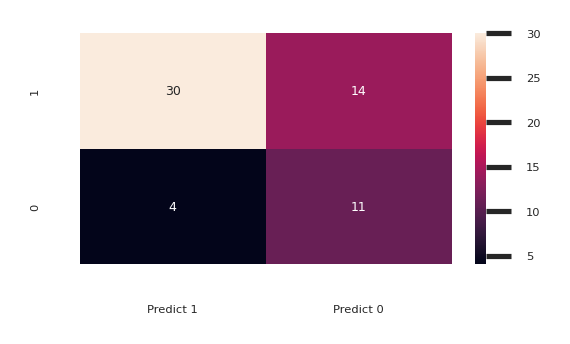

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_lr, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (2,1))
sns.heatmap(df_cm, annot=True, fmt='g')

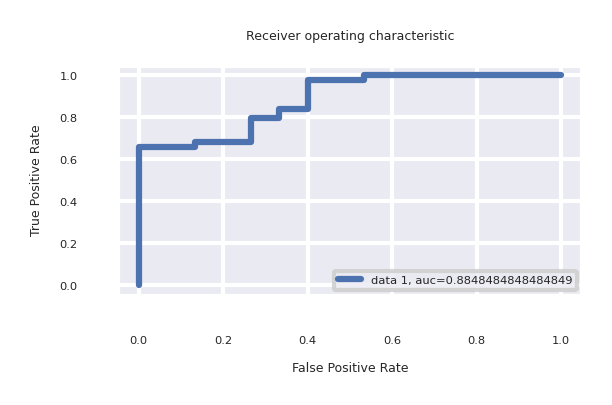

In [ ]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc
plt.figure(figsize = (2,1))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

Logistic Regression -Accuracy

In [ ]:
lr_auc = auc
lr_auc

0.8848484848484849

# **Decision Tree**

In [ ]:
def dtree_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 15)}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # decision tree model
    dtree = DecisionTreeClassifier()

    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    #fit model to data
    dtree_gscv.fit(X, y)

    return dtree_gscv.best_params_

In [ ]:
dtree_grid_search(X_train, y_train)

{'criterion': 'gini', 'max_depth': 11}

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
dTree.fit(X_train, y_train)

print(dTree.score(X_train,y_train))
print(dTree.score(X_test,y_test))

y_pred_dtree = dTree.predict(X_test)

print(metrics.classification_report(y_test, y_pred_dtree))

0.7718446601941747
0.7457627118644068
              precision    recall  f1-score   support

           0       0.50      0.93      0.65        15
           1       0.97      0.68      0.80        44

    accuracy                           0.75        59
   macro avg       0.73      0.81      0.73        59
weighted avg       0.85      0.75      0.76        59



In [ ]:
dt_tacc = dTree.score(X_test,y_test)
dt_train_acc = dTree.score(X_train, y_train)

<Axes: >

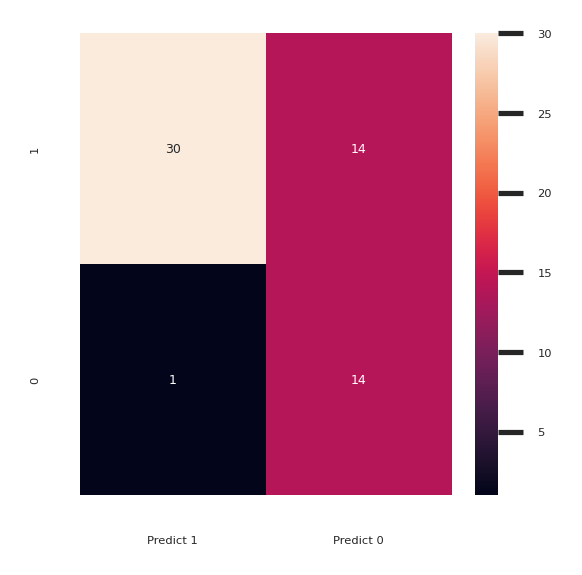

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_dtree, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (2,2))
sns.heatmap(df_cm, annot=True, fmt='g')

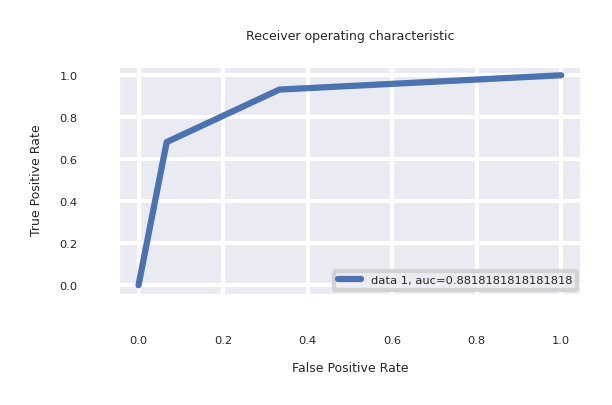

In [ ]:
y_pred_proba = dTree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc
plt.figure(figsize = (2,1))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
dt_auc = auc
dt_auc

0.8818181818181818

***# ADA GRID SEARCH ***

In [ ]:
def ada_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'n_estimators':[10, 50, 100, 500], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # AdaBoost model
    ada = AdaBoostClassifier()

    # Use gridsearch to test all values
    ada_gscv = GridSearchCV(ada, param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    #fit model to data
    grid_result = ada_gscv.fit(X, y)

    return ada_gscv.best_params_

In [ ]:
abcl = AdaBoostClassifier(n_estimators=15, learning_rate = 0.01)
abcl = abcl.fit(X_train, y_train)

y_pred_abcl = abcl.predict(X_test)

print(abcl.score(X_train, y_train))
print(abcl.score(X_test,y_test))

print(metrics.classification_report(y_test, y_pred_abcl))

0.8155339805825242
0.864406779661017
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.93      0.89      0.91        44

    accuracy                           0.86        59
   macro avg       0.82      0.84      0.83        59
weighted avg       0.87      0.86      0.87        59



In [ ]:
ada_train_acc = abcl.score(X_train, y_train)
ada_tacc = abcl.score(X_test,y_test)

<Axes: >

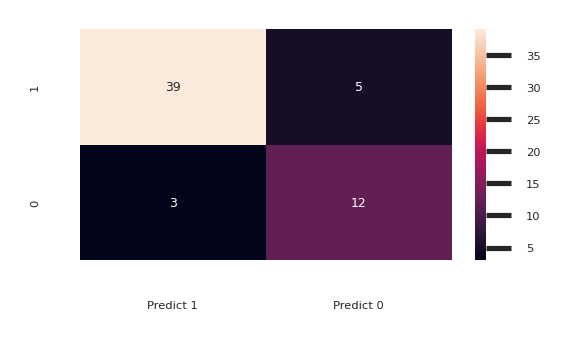

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_abcl, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (2,1))
sns.heatmap(df_cm, annot=True, fmt='g')

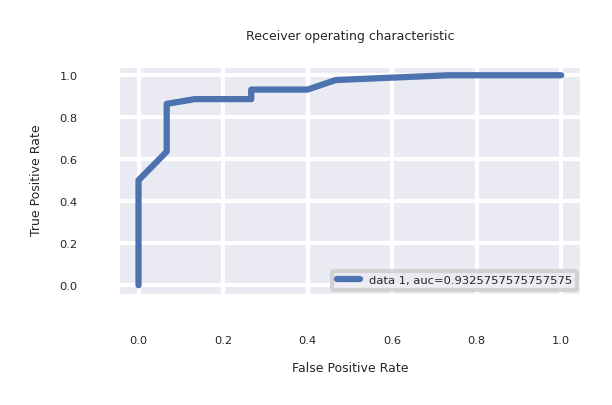

In [ ]:
y_pred_proba = abcl.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc
plt.figure(figsize = (2,1))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
ada_auc = auc
ada_auc

0.9325757575757575

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

# **Random Forest**

In [ ]:
model=RandomForestClassifier()
y_pred_rfcl = abcl.predict(X_test)

In [ ]:
model.fit(X_train, y_train)
y_hat_test = model.predict(X_test).astype(int)
y_hat_train = model.predict(X_train).astype(int)
print('Accuracy Score is : ', round(accuracy_score(y_test, y_hat_test)))

Accuracy Score is :  1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Remove the learning_rate parameter
abcl = RandomForestClassifier(n_estimators=15)
abcl = abcl.fit(X_train, y_train)

y_pred_abcl = abcl.predict(X_test)

print(abcl.score(X_train, y_train))
print(abcl.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_abcl))

1.0
0.8983050847457628
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.91      0.95      0.93        44

    accuracy                           0.90        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.90      0.90      0.90        59



In [ ]:
y_hat_test = model.predict(X_test).astype(int)
y_hat_train = model.predict(X_train).astype(int)
print('Accuracy Score is : ',round( accuracy_score(y_test, y_hat_test),2))

Accuracy Score is :  0.9


In [ ]:
rfcl=model

<Axes: >

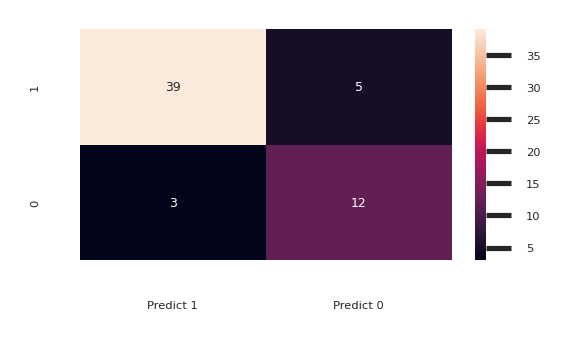

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_rfcl, labels=[1,0]) # Use y_pred_rfcl instead of y_pred_knn

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (2,1))
sns.heatmap(df_cm, annot=True, fmt='g')

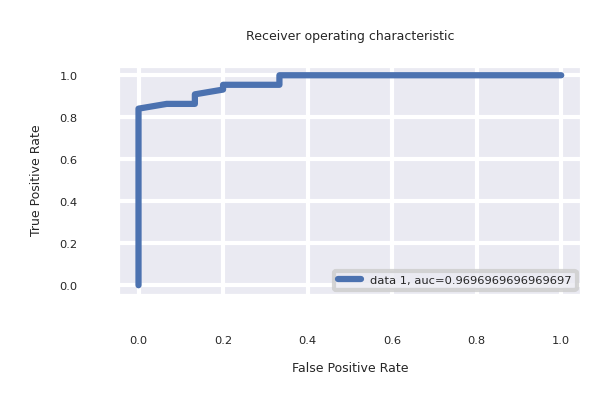

In [ ]:
y_pred_proba = rfcl.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc
plt.figure(figsize = (2,1))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
rf_auc = auc
rf_auc

0.9696969696969697

**KNN**

In [ ]:
def knn_grid_search(X, y):
    #create a dictionary of all values we want to test
    k_range = list(range(1, 31))
    param_grid = dict(n_neighbors=k_range)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    knn = KNeighborsClassifier()

    #use gridsearch to test all values
    knn_gscv = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    #fit model to data
    knn_gscv.fit(X, y)

    return knn_gscv.best_params_

In [ ]:
knn_grid_search(X_train, y_train)

{'n_neighbors': 1}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_knn))

1.0
0.9830508474576272
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.98      1.00      0.99        44

    accuracy                           0.98        59
   macro avg       0.99      0.97      0.98        59
weighted avg       0.98      0.98      0.98        59



In [ ]:
knn_tacc = knn.score(X_test, y_test)
knn_train_acc = knn.score(X_train, y_train)

<Axes: >

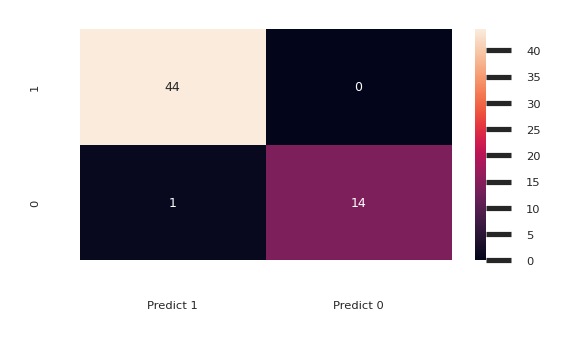

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (2,1))
sns.heatmap(df_cm, annot=True, fmt='g')

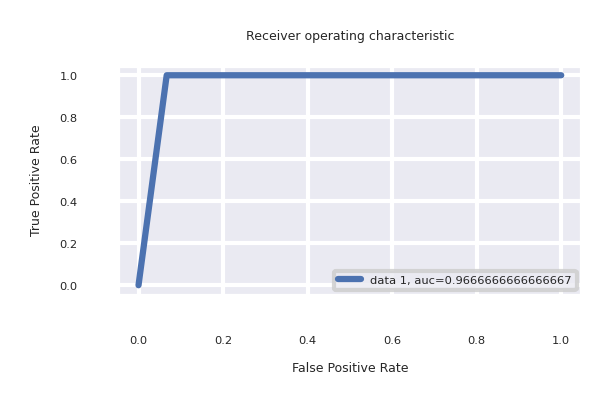

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc
plt.figure(figsize = (2,1))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
knn_auc= auc
knn_auc

0.9666666666666667

# **SVM**

In [ ]:
def svm_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001, 0.4, 0.2, 0.8],'kernel': ['rbf', 'poly', 'sigmoid']}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    svm = SVC()

    #use gridsearch to test all values
    svm_gscv = RandomizedSearchCV(estimator = svm,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
    #fit model to data
    svm_gscv.fit(X, y)

    return svm_gscv.best_params_

In [ ]:
svm_grid_search(X_train, y_train)

{'kernel': 'poly', 'gamma': 0.4, 'C': 100}

In [ ]:
from sklearn import svm
svm = SVC(gamma=0.4, C=100, kernel='rbf', probability=True)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_svm))

1.0
0.9491525423728814
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      1.00      0.97        44

    accuracy                           0.95        59
   macro avg       0.97      0.90      0.93        59
weighted avg       0.95      0.95      0.95        59



In [ ]:
svm_tacc = svm.score(X_test, y_test)
svm_train_acc = svm.score(X_train, y_train)

<Axes: >

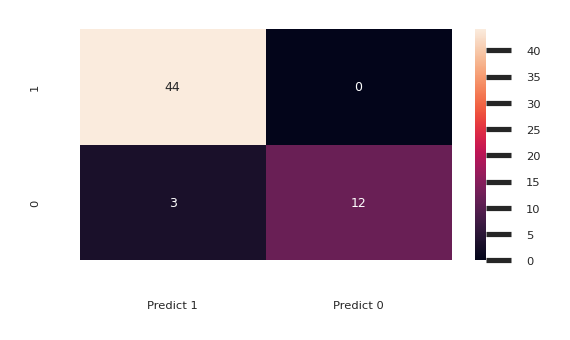

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (2,1))
sns.heatmap(df_cm, annot=True, fmt='g')

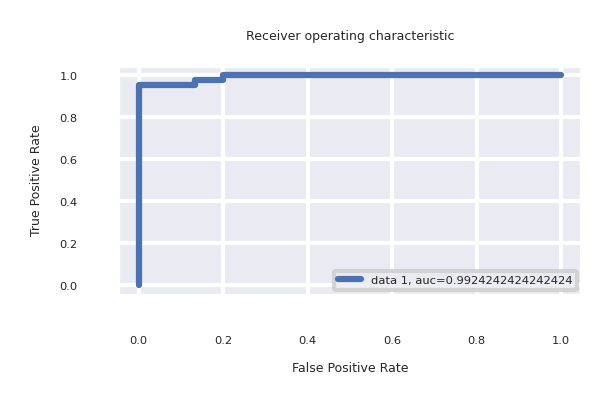

In [ ]:
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc
plt.figure(figsize = (2,1))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
svm_auc = auc
svm_auc

0.9924242424242424

**XG BOOST GRID SEARCH**

In [ ]:
def xgb_grid_search(X, y):
    # Create a dictionary of all values we want to test
    param_grid = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    xgb = XGBClassifier()

    #use gridsearch to test all values
    xgb_gscv =  RandomizedSearchCV(estimator = xgb,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
    #fit model to data
    xgb_gscv.fit(X, y)

    return xgb_gscv.best_params_

In [ ]:
xgb_grid_search(X_train, y_train)

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [ ]:
xgb = XGBClassifier(min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.3, colsample_bytree=0.3)
xgb.fit(X_train,y_train)

y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:",metrics.precision_score(y_test, y_pred_xgb))
print("Recall:",metrics.recall_score(y_test, y_pred_xgb))

print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.91      0.98      0.95        44

    accuracy                           0.92        59
   macro avg       0.92      0.86      0.88        59
weighted avg       0.92      0.92      0.91        59

Accuracy: 0.9152542372881356
Precision: 0.9148936170212766
Recall: 0.9772727272727273
1.0
0.9152542372881356


In [ ]:
xgb_tacc = xgb.score(X_test,y_test)
xgb_train_acc = xgb.score(X_train, y_train)

<Axes: >

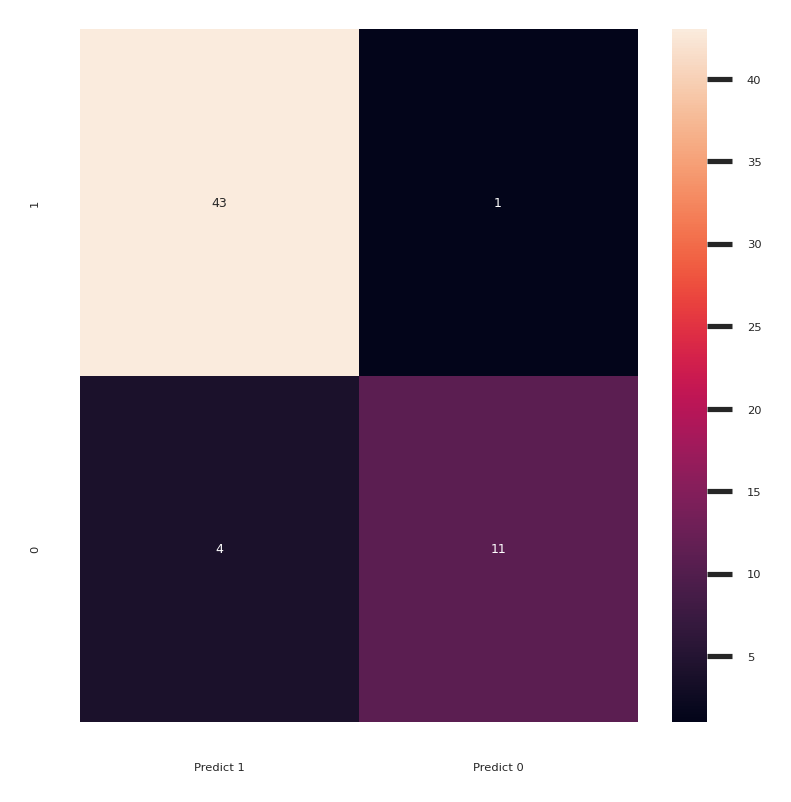

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_xgb, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (3,3))
sns.heatmap(df_cm, annot=True, fmt='g')

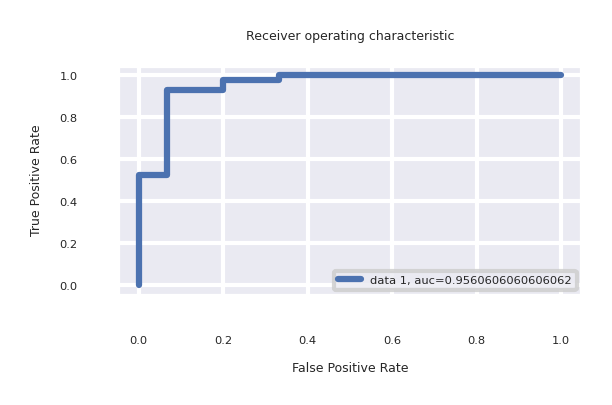

In [ ]:
y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc
plt.figure(figsize = (2,1))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
xgb_auc = auc
xgb_auc

0.9560606060606062

In [ ]:
def comp_model(model_list, model_train_acc_list, model_test_acc_list, model_auc_list):
    data = {"Model Name": model_list, "Train Accuracy(%)": [i*100 for i in model_train_acc_list], "Test Accuracy(%)": [i*100 for i in model_test_acc_list], "AUC Score": model_auc_list}
    Comparision = pd.DataFrame(data)
    return Comparision

In [ ]:
skfold = StratifiedKFold(n_splits=5)
model = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(model, feature, y, cv=skfold)

print(scores)
print(np.mean(scores))

[0.74358974 0.79487179 0.8974359  0.71794872 0.74358974]
0.7794871794871795


In [ ]:
skfold = StratifiedKFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(model, feature, y, cv=skfold)

print(scores)
print(np.mean(scores))

[0.8        0.85       0.85       0.9        1.         0.89473684
 0.94736842 0.78947368 0.78947368 0.84210526]
0.8663157894736843


In [ ]:
skfold = StratifiedKFold(n_splits=5)
model = SVC(gamma=0.4, C=100, kernel='rbf', probability=True)
scores = cross_val_score(model, feature, y, cv=skfold)

print(scores)
print(np.mean(scores))

[0.82051282 0.79487179 0.87179487 0.76923077 0.74358974]
0.8


In [ ]:
skfold = StratifiedKFold(n_splits=10)
model = SVC(gamma=0.4, C=100, kernel='rbf', probability=True)
scores = cross_val_score(model, feature, y, cv=skfold)

print(scores)
print(np.mean(scores))

In [ ]:
df[df["status"]==0].head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,NHR,status,RPDE,DFA,spread1,spread2,D2
30,197.076,206.896,192.055,0.00289,0.01098,0.00339,0,0.422229,0.741367,-7.348300,0.177551,1.743867
31,199.228,209.512,192.091,0.00241,0.01015,0.00167,0,0.432439,0.742055,-7.682587,0.173319,2.103106


In [ ]:
df[df["status"]==1].head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,NHR,status,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.04374,0.02211,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.06134,0.01929,1,0.458359,0.819521,-4.075192,0.335590,2.486855


In [ ]:
import pickle

# Save trained model to file
pickle.dump(knn, open("p.pkl", "wb"))

In [ ]:
loaded_model = pickle.load(open("p.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.9830508474576272

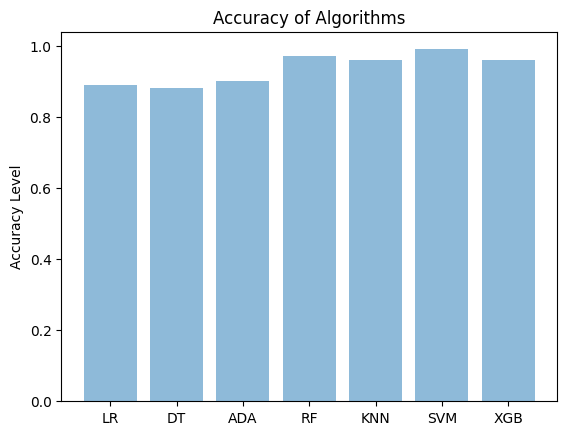

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('LR','DT','ADA','RF','KNN','SVM','XGB')
y_pos = np.arange(len(objects))
performance = [.89,.88,.90,.97,.96,.99,.96]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Level')
plt.title('Accuracy of Algorithms')

plt.show()

In [ ]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform(in_data_re)

#print the predicted output for input array
print("Parkinson's Disease Detected" if knn.predict(in_data_sca) else "No Parkinson's Disease Detected")

148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.0605,0.01831,0.16300,0.00950
No Parkinson's Disease Detected


In [ ]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform(in_data_re)

#print the predicted output for input array
print("Parkinson's Disease Detected" if knn.predict(in_data_sca) else "No Parkinson's Disease Detected")

115.38000,123.010900,108.63400,0.00332,0.00003,0.00199,0.00480,0.01503,0.01503,0.13700,0.00812
Parkinson's Disease Detected


In [ ]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform (in_data_re)

#print the predicted output for input array
print("Parkinson's Disease Detected" if svm.predict(in_data_sca) else "No Parkinson's Disease Detected")

148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.0605,0.01831,0.16300,0.00950
Parkinson's Disease Detected
